In [1]:
import numpy as np
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


In [45]:
# Read area file for ocean mask
path_input = f'/perm/nk0j/ecearth3-cmip6/runtime/classic/fwf/interactive/input/'
file_area = f'{path_input}/areacello_Ofx_EC-Earth3_historical_r1i1p1f1_gn.nc'

In [2]:
# Read Erwins runoff_maps.nc to dataset
data_dir = '/home/nk0j/preprocessing/inputfiles_Erwin'
runoff_file = f'{data_dir}/runoff_maps.nc'
ds_runoff = xr.open_dataset(runoff_file)
ds_runoff

<xarray.Dataset>
Dimensions:            (lon: 512, lat: 256)
Coordinates:
  * lon                (lon) float64 0.0 0.7031 1.406 ... 357.9 358.6 359.3
  * lat                (lat) float64 -89.46 -88.77 -88.07 ... 88.07 88.77 89.46
Data variables:
    drainage_basin_id  (lat, lon) int32 ...
    arrival_point_id   (lat, lon) int32 ...
    calving_point_id   (lat, lon) int32 ...
Attributes:
    ece-origin:  Klaus Wyser (SMHI) for EC-Earth

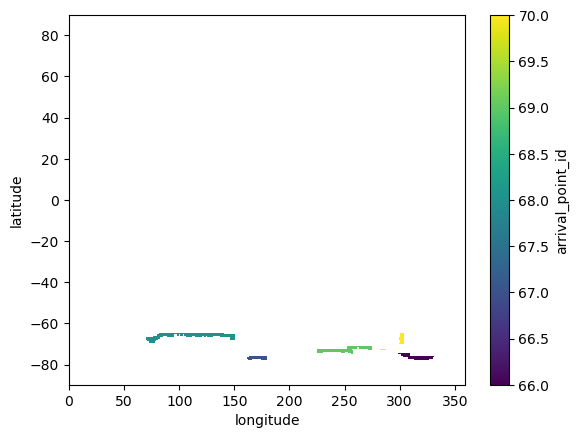

In [3]:
ds_basal_melt_mask = ds_runoff.arrival_point_id.where(ds_runoff.arrival_point_id>=66)
ds_basal_melt_mask.plot.pcolormesh()

In [4]:
ds_basal_melt_mask.name = 'basal_melt_mask'



In [5]:

ds_basal_melt_mask = ds_basal_melt_mask.fillna(0)
df_basal_melt_mask = ds_basal_melt_mask.values
df_basal_melt_mask


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
df_basal_melt_mask[df_basal_melt_mask>0] = 1
df_basal_melt_mask

df_basal_melt_mask.max()


1.0

In [7]:

df_basal_melt_mask.min()


0.0

In [8]:
ds_basal_melt_mask.attrs = {'long_name':'basal melt mask', 'units':''}
ds_basal_melt_mask


<xarray.DataArray 'basal_melt_mask' (lat: 256, lon: 512)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lon      (lon) float64 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
  * lat      (lat) float64 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46
Attributes:
    long_name:  basal melt mask
    units:

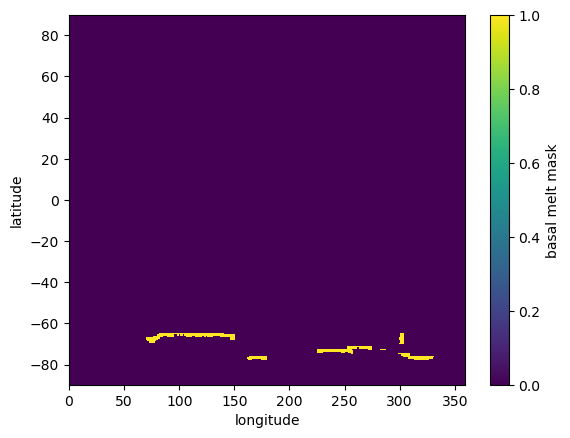

In [9]:
ds_basal_melt_mask.plot.pcolormesh()

In [10]:
# final file
ds_basal_melt_mask = ds_basal_melt_mask.expand_dims({'time_counter': 1})
ds_basal_melt_mask


<xarray.DataArray 'basal_melt_mask' (time_counter: 1, lat: 256, lon: 512)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * lon      (lon) float64 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
  * lat      (lat) float64 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46
Dimensions without coordinates: time_counter
Attributes:
    long_name:  basal melt mask
    units:

In [11]:
ds_basal_melt_mask.to_netcdf(f'/home/nk0j/preprocessing/basal_melt_mask.nc', unlimited_dims=['time_counter'])


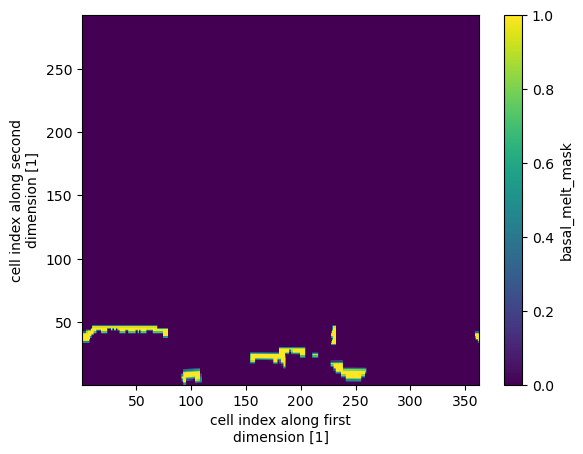

In [12]:
# Regrid to ORCA1 with 'regrid_distribution_maps.sh' 
# Then read in output file
bm_mask_ORCA1_file = f'{data_dir}/../ncfiles/basal_melt_mask_ORCA1.nc'
ds_bm_ORCA1 = xr.open_dataarray(bm_mask_ORCA1_file)
ds_bm_ORCA1.mean('time').plot.pcolormesh()

In [13]:

df_bm_ORCA1 = ds_bm_ORCA1.values
df_bm_ORCA1


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [14]:

df_bm_ORCA1[df_bm_ORCA1>0] = 1
df_bm_ORCA1


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [15]:
ds_bm_ORCA1

<xarray.DataArray 'basal_melt_mask' (time: 1, j: 292, i: 362)>
array([[[0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.],
        ...,
        [0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]]])
Coordinates:
  * time       (time) float64 0.0
    longitude  (j, i) float64 ...
    latitude   (j, i) float64 ...
  * i          (i) float64 1.0 2.0 3.0 4.0 5.0 ... 358.0 359.0 360.0 361.0 362.0
  * j          (j) float64 1.0 2.0 3.0 4.0 5.0 ... 288.0 289.0 290.0 291.0 292.0
Attributes:
    long_name:  basal melt mask

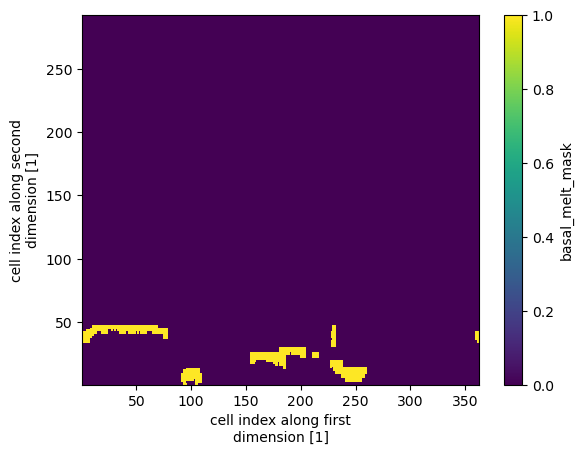

In [16]:
ds_bm_ORCA1.mean('time').plot.pcolormesh()

In [55]:
#file_zshelf = './ncfiles/zshelf_200m.nc'
#ds_zshelf = xr.open_dataarray(file_zshelf)
#ds_zshelf
ds_area = xr.open_dataset(file_area)
ds_area = ds_area.areacello

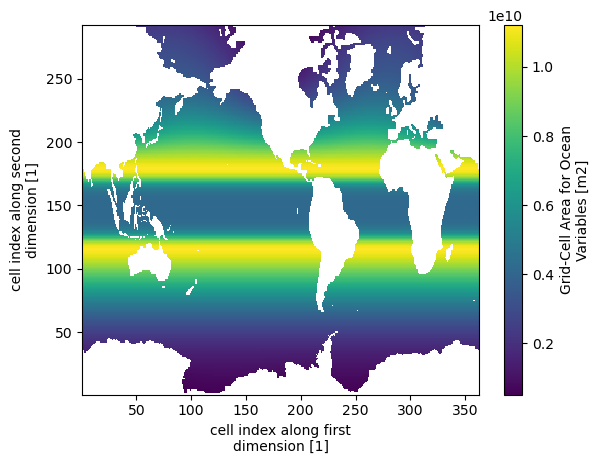

In [56]:
ds_area.plot.pcolormesh()

In [57]:
#ds_zshelf_mask = ds_zshelf.mean('time_counter')
#ds_zshelf_mask.dims
ds_area.dims

('j', 'i')

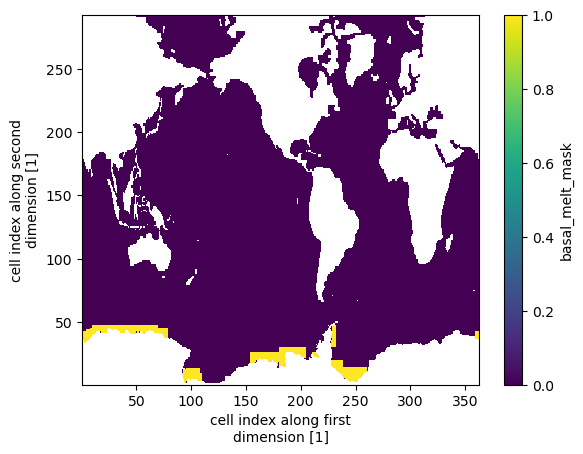

In [58]:
# Mask regridded grid point that fall on land (if any)
ds_bm_ORCA1_ocean = ds_bm_ORCA1.mean('time').where(ds_area > 0)
ds_bm_ORCA1_ocean.dims
ds_bm_ORCA1_ocean.plot.pcolormesh()

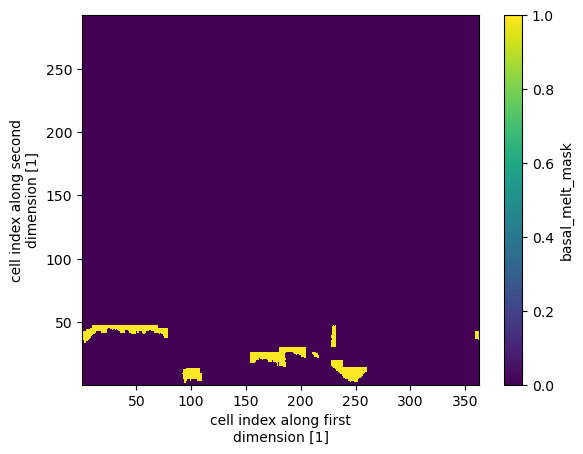

In [59]:
ds_bm_ORCA1_ocean = ds_bm_ORCA1_ocean.fillna(0)
ds_bm_ORCA1_ocean.plot.pcolormesh()

In [60]:
ds_bm_ORCA1_ocean.to_netcdf('./masks/basal_melt_mask_ORCA1_ocean.nc')

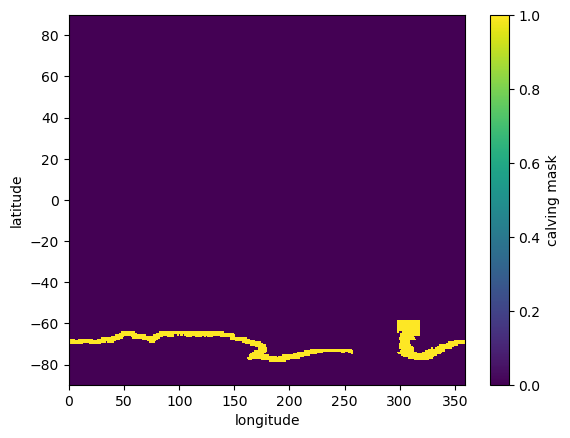

In [61]:
ds_calving_mask = ds_runoff.calving_point_id.where(ds_runoff.calving_point_id>=66)
#ds_calving_mask.plot.pcolormesh()
ds_calving_mask.name = 'calving_mask'

ds_calving_mask = ds_calving_mask.fillna(0)
df_calving_mask = ds_calving_mask.values
df_calving_mask

df_calving_mask[df_calving_mask>0] = 1
df_calving_mask

df_calving_mask.max()


df_calving_mask.min()

ds_calving_mask.attrs = {'long_name':'calving mask', 'units':''}
ds_calving_mask

ds_calving_mask.plot.pcolormesh()
# final file
ds_calving_mask = ds_calving_mask.expand_dims({'time_counter': 1})
ds_calving_mask

ds_calving_mask.to_netcdf(f'/home/nk0j/preprocessing/ncfiles/calving_mask.nc', unlimited_dims=['time_counter'])


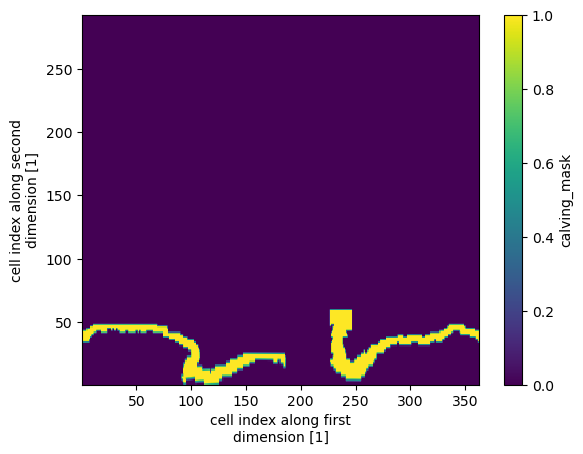

In [62]:
# Regrid to ORCA1 with 'regrid_distribution_maps.sh' 
# Then read in output file
cal_mask_ORCA1_file = f'{data_dir}/../ncfiles/calving_mask_ORCA1.nc'
ds_cal_ORCA1 = xr.open_dataarray(cal_mask_ORCA1_file)
ds_cal_ORCA1.mean('time').plot.pcolormesh()

In [63]:

df_cal_ORCA1 = ds_cal_ORCA1.values
df_cal_ORCA1


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [64]:

df_cal_ORCA1[df_cal_ORCA1>0] = 1
df_cal_ORCA1


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [65]:
ds_cal_ORCA1

<xarray.DataArray 'calving_mask' (time: 1, j: 292, i: 362)>
array([[[0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.],
        ...,
        [0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]]])
Coordinates:
  * time       (time) float64 0.0
    longitude  (j, i) float64 ...
    latitude   (j, i) float64 ...
  * i          (i) float64 1.0 2.0 3.0 4.0 5.0 ... 358.0 359.0 360.0 361.0 362.0
  * j          (j) float64 1.0 2.0 3.0 4.0 5.0 ... 288.0 289.0 290.0 291.0 292.0
Attributes:
    long_name:  calving mask

In [66]:
ds_cal_ORCA1 = ds_cal_ORCA1.rename({'time':'time_counter'})

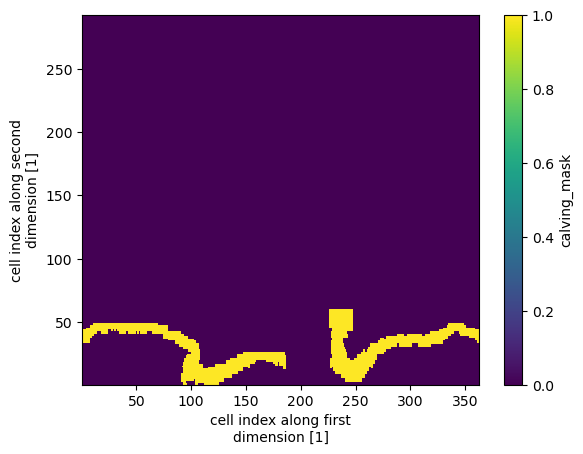

In [67]:
ds_cal_ORCA1.mean('time_counter').plot.pcolormesh()

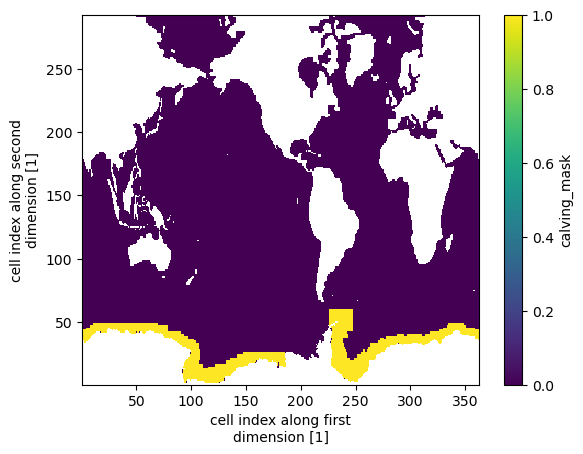

In [69]:
# Mask regridded grid point that fall on land (if any)
ds_cal_ORCA1_ocean = ds_cal_ORCA1.mean('time_counter').where(ds_area > 0)
ds_cal_ORCA1_ocean.dims
ds_cal_ORCA1_ocean.plot.pcolormesh()

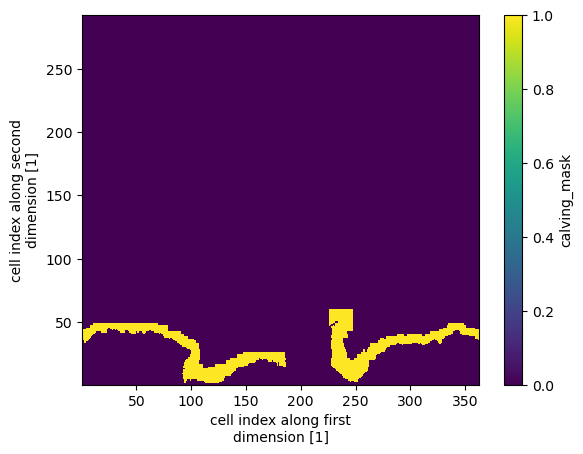

In [70]:
ds_cal_ORCA1_ocean = ds_cal_ORCA1_ocean.fillna(0)
ds_cal_ORCA1_ocean.plot.pcolormesh()

In [71]:
ds_cal_ORCA1.time_counter


<xarray.DataArray 'time_counter' (time_counter: 1)>
array([0.])
Coordinates:
  * time_counter  (time_counter) float64 0.0
Attributes:
    standard_name:  time
    units:          day as %Y%m%d.%f
    calendar:       proleptic_gregorian
    axis:           T

In [72]:
ds_cal_ORCA1_ocean.to_netcdf('./masks/calving_mask_ORCA1_ocean.nc')

In [55]:
runoff_depth_file = f'{data_dir}/runoff_depth.nc'
print(runoff_depth_file)
ds_runoff_depth = xr.open_dataset(runoff_depth_file)
ds_runoff_depth


/home/nk0j/preprocessing/inputfiles_Erwin/runoff_depth.nc


<xarray.Dataset>
Dimensions:       (y: 292, x: 362, z: 75, t: 1)
Dimensions without coordinates: y, x, z, t
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    rodepth       (t, y, x) float64 ...
Attributes:
    file_name:    runoff_depth.nc
    TimeStamp:    18/11/2016 10:21:48 +0100
    ece-comment:  Created (ln_rnf_depth_ini=T) from SHACONEMO INPUTS_ORCA1_LI...
    ece-origin:   UFla (SMHI) for EC-Earth

<xarray.DataArray 'time_counter' (t: 1)>
[1 values with dtype=float64]
Dimensions without coordinates: t

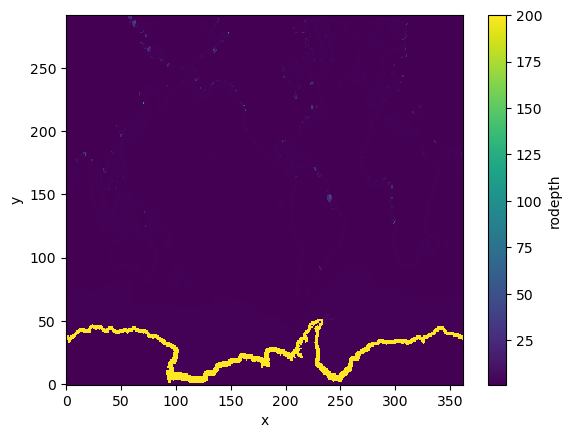

In [56]:
ds_runoff_depth.rodepth[0,:,:].plot.pcolormesh()
t = ds_runoff_depth.time_counter
t
#ds_basal_melt_mask.time_counter.values = 1.

In [57]:
path_input = f'/perm/nk0j/ecearth3-cmip6/runtime/classic/fwf/interactive/input/'
file_distribution_mask = f'{path_input}/FriverDistributionMask_AIS_ORCA1.nc'


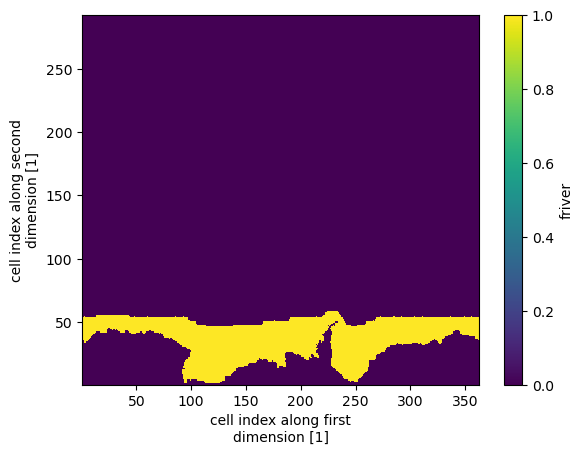

In [58]:
ds_distribution_mask = xr.open_dataarray(file_distribution_mask)
ds_distribution_mask.plot.pcolormesh()

In [59]:
ds_distribution_mask

<xarray.DataArray 'friver' (j: 292, i: 362)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
  * j          (j) int32 1 2 3 4 5 6 7 8 9 ... 285 286 287 288 289 290 291 292
  * i          (i) int32 1 2 3 4 5 6 7 8 9 ... 355 356 357 358 359 360 361 362
    latitude   (j, i) float64 ...
    longitude  (j, i) float64 ...